# data collection/**preparation**

the data used here contains v.id,on road old,on road now, 'years','km','rating','condition','economy','top speed','hp','torque','current price', columns

In [2]:
import tensorflow as tf # models
from tensorflow.keras.layers import Normalization,Dense,InputLayer  #normalizing data and dense for linear regression
import pandas as pd #reading and processing data
import seaborn as sns #visualisation representing data in graph
from  tensorflow.keras.losses import MeanSquaredError ,Huber, MeanAbsoluteError # for calculating cost [to be minimise]
from tensorflow.keras.optimizers import Adam #optimisation to set different values
from tensorflow.keras.metrics import RootMeanSquaredError #to measure performance
import matplotlib.pyplot as plt #to plot graph

In [3]:
#loading data
data=pd.read_csv("train.csv",sep=",")
data.head()
data.shape

(1000, 12)

In [ ]:
# show each feature related to othre as well as itself[daigonal]
sns.pairplot(data[['years','km','rating','condition','economy','top speed','hp','torque','current price']],diag_kind="kde")


In [6]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data,tf.float32) #to cast data into float
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


to shuffle data to avoid baisness

In [7]:
tensor_data=tf.random.shuffle(tensor_data)#to shuffle data rows
print(tensor_data[:5])

tf.Tensor(
[[7.890000e+02 5.857400e+05 8.437260e+05 5.000000e+00 1.075920e+05
  5.000000e+00 8.000000e+00 1.500000e+01 1.390000e+02 1.010000e+02
  1.220000e+02 3.010425e+05]
 [7.550000e+02 6.239720e+05 7.346570e+05 2.000000e+00 1.217470e+05
  4.000000e+00 1.000000e+00 1.000000e+01 1.920000e+02 8.500000e+01
  1.110000e+02 1.930670e+05]
 [1.230000e+02 5.539890e+05 8.418520e+05 3.000000e+00 1.471580e+05
  2.000000e+00 1.000000e+00 8.000000e+00 1.590000e+02 6.200000e+01
  8.200000e+01 1.093670e+05]
 [2.540000e+02 5.214470e+05 7.245110e+05 2.000000e+00 1.144050e+05
  5.000000e+00 3.000000e+00 1.400000e+01 1.790000e+02 6.300000e+01
  7.100000e+01 1.672815e+05]
 [2.640000e+02 5.297610e+05 7.760020e+05 6.000000e+00 1.321520e+05
  1.000000e+00 5.000000e+00 1.500000e+01 1.440000e+02 8.000000e+01
  1.050000e+02 1.222255e+05]], shape=(5, 12), dtype=float32)


In [21]:
X=tensor_data[:,3:-1]#to select particular columns [['years','km','rating','condition','economy','top speed','hp','torque']]
y=tensor_data[:,-1]# current price
print(X[:5])
print(X.shape)
print(X[:5].shape)
y=tf.expand_dims(y,axis=-1)#-1 and 1 will work same in this case
print(y[:5].shape)
print(y.shape)

tf.Tensor(
[[5.00000e+00 1.07592e+05 5.00000e+00 8.00000e+00 1.50000e+01 1.39000e+02
  1.01000e+02 1.22000e+02]
 [2.00000e+00 1.21747e+05 4.00000e+00 1.00000e+00 1.00000e+01 1.92000e+02
  8.50000e+01 1.11000e+02]
 [3.00000e+00 1.47158e+05 2.00000e+00 1.00000e+00 8.00000e+00 1.59000e+02
  6.20000e+01 8.20000e+01]
 [2.00000e+00 1.14405e+05 5.00000e+00 3.00000e+00 1.40000e+01 1.79000e+02
  6.30000e+01 7.10000e+01]
 [6.00000e+00 1.32152e+05 1.00000e+00 5.00000e+00 1.50000e+01 1.44000e+02
  8.00000e+01 1.05000e+02]], shape=(5, 8), dtype=float32)
(1000, 8)
(5, 8)
(5, 1)
(1000, 1)


In [13]:
normalizer = Normalization(axis=-1)#defining a normalizer to normalize data

# Use adapt() to compute mean and variance from the data
normalizer.adapt(X)
print(X)
print(X.shape)

tf.Tensor(
[[5.00000e+00 1.07592e+05 5.00000e+00 ... 1.39000e+02 1.01000e+02
  1.22000e+02]
 [2.00000e+00 1.21747e+05 4.00000e+00 ... 1.92000e+02 8.50000e+01
  1.11000e+02]
 [3.00000e+00 1.47158e+05 2.00000e+00 ... 1.59000e+02 6.20000e+01
  8.20000e+01]
 ...
 [6.00000e+00 9.70440e+04 3.00000e+00 ... 1.77000e+02 8.30000e+01
  8.10000e+01]
 [6.00000e+00 1.49529e+05 1.00000e+00 ... 1.47000e+02 7.30000e+01
  1.03000e+02]
 [5.00000e+00 9.46880e+04 5.00000e+00 ... 1.73000e+02 8.40000e+01
  9.90000e+01]], shape=(1000, 8), dtype=float32)
(1000, 8)


modelling data can be done by
1.sequential APi
2.functional api
3.subclassing method

In [12]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [14]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


we are doing shuffling after each epoch so that model not get used to same type of data and different batch in each proceesing by this we can a large number in batch variation and our model not get used to one

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [16]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[2.00000e+00 1.14405e+05 5.00000e+00 3.00000e+00 1.40000e+01 1.79000e+02
  6.30000e+01 7.10000e+01]
 [3.00000e+00 1.32129e+05 2.00000e+00 8.00000e+00 1.20000e+01 2.00000e+02
  9.50000e+01 7.90000e+01]
 [4.00000e+00 1.02557e+05 3.00000e+00 6.00000e+00 1.30000e+01 1.92000e+02
  6.30000e+01 1.01000e+02]
 [6.00000e+00 1.32152e+05 1.00000e+00 5.00000e+00 1.50000e+01 1.44000e+02
  8.00000e+01 1.05000e+02]
 [7.00000e+00 6.63670e+04 5.00000e+00 4.00000e+00 1.50000e+01 1.47000e+02
  5.90000e+01 7.20000e+01]
 [4.00000e+00 9.28230e+04 5.00000e+00 9.00000e+00 1.50000e+01 1.89000e+02
  1.19000e+02 9.10000e+01]
 [2.00000e+00 1.29439e+05 2.00000e+00 4.00000e+00 1.50000e+01 1.53000e+02
  1.06000e+02 1.07000e+02]
 [6.00000e+00 1.21264e+05 3.00000e+00 2.00000e+00 9.00000e+00 1.98000e+02
  1.13000e+02 8.60000e+01]
 [6.00000e+00 1.08644e+05 2.00000e+00 2.00000e+00 9.00000e+00 1.55000e+02
  6.70000e+01 1.36000e+02]
 [5.00000e+00 1.06474e+05 3.00000e+00 2.00000e+00 1.20000e+01 1.97000e+02
  1.15

In [22]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [31]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [32]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

# Model Creation and Training

In [26]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

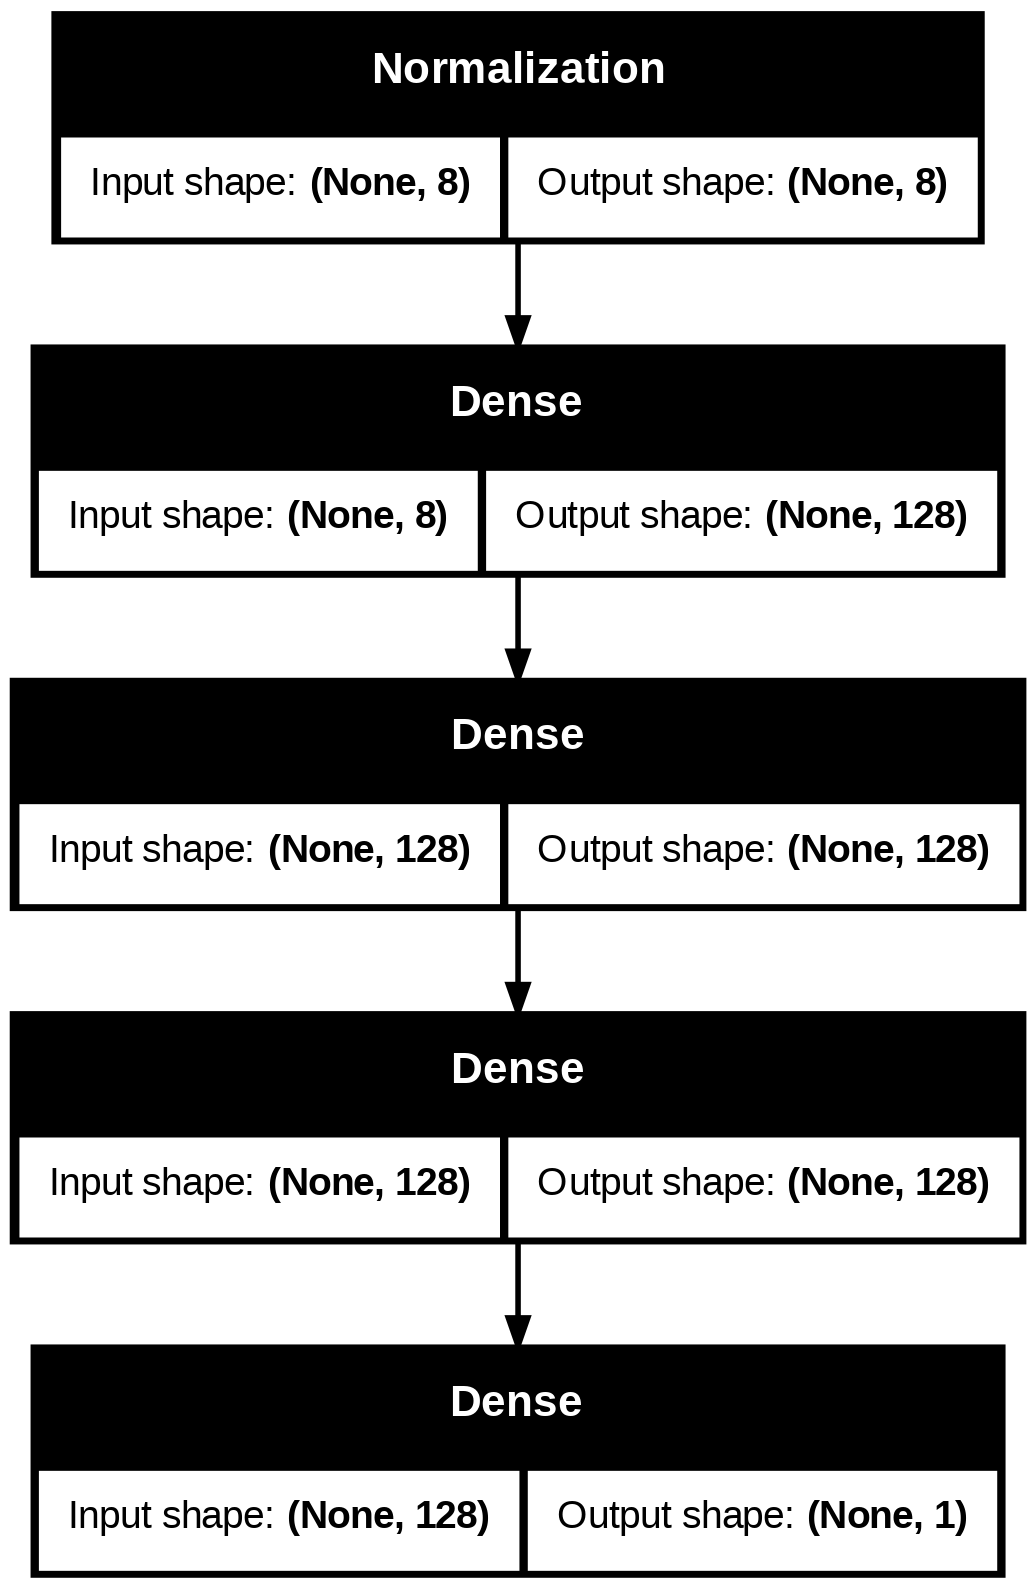

In [27]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [29]:
model.compile(
    loss=MeanAbsoluteError(),
    optimizer=Adam(learning_rate=0.1),  # Set learning_rate explicitly
    metrics=['RootMeanSquaredError']  # Pass the metric name as a string within a list
)

In [33]:
#training our model
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 76561.8281 - loss: 61859.1328 - val_RootMeanSquaredError: 59557.7188 - val_loss: 49273.5586
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 68100.4531 - loss: 54858.5508 - val_RootMeanSquaredError: 55877.1289 - val_loss: 43885.0547
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 57189.6211 - loss: 46088.4219 - val_RootMeanSquaredError: 54049.4688 - val_loss: 43923.1016
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 53639.3477 - loss: 42823.3828 - val_RootMeanSquaredError: 50535.8711 - val_loss: 39860.2383
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 50516.8984 - loss: 39984.2930 - val_RootMeanSquaredError: 51907.0820 - val_loss: 42201.6211
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 55703.9961 - loss: 44314.3828 - val_RootMeanSquaredError: 54993.0586 - val_loss: 45993.214

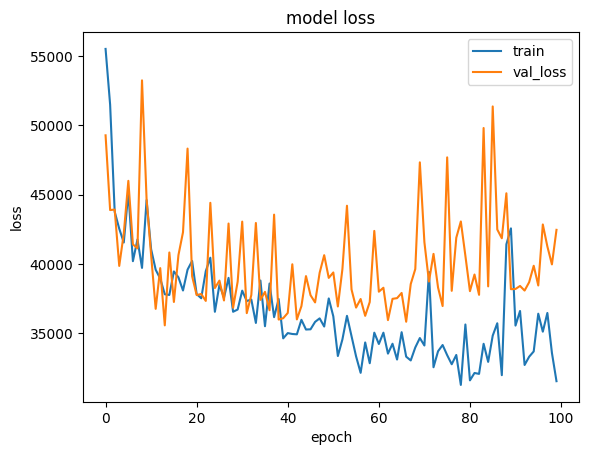

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

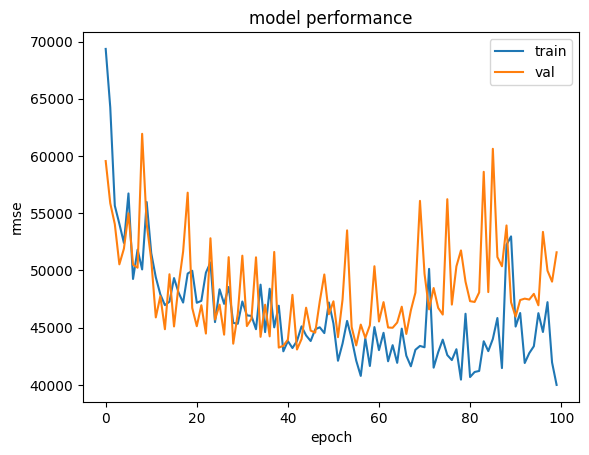

In [37]:
plt.plot(history.history['RootMeanSquaredError'])
plt.plot(history.history['val_RootMeanSquaredError'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Model Evaluation and Testing

In [38]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - RootMeanSquaredError: 56197.8008 - loss: 45532.8711 


[45204.53125, 55784.86328125]

In [39]:
X_test.shape

TensorShape([100, 8])

In [40]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[329453.2]], dtype=float32)

In [41]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([437043.5], dtype=float32)>

In [42]:
y_true = list(y_test[:,0].numpy())

In [43]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[np.float32(329453.2), np.float32(197018.4), np.float32(266400.66), np.float32(184546.19), np.float32(153750.19), np.float32(410044.47), np.float32(64184.15), np.float32(242801.7), np.float32(249796.52), np.float32(286483.16), np.float32(177245.39), np.float32(213487.92), np.float32(266237.66), np.float32(204229.62), np.float32(249801.92), np.float32(432070.7), np.float32(277003.9), np.float32(372019.62), np.float32(404804.97), np.float32(173726.77), np.float32(137264.34), np.float32(229076.78), np.float32(193747.55), np.float32(143229.67), np.float32(344743.38), np.float32(278941.6), np.float32(267472.22), np.float32(405460.47), np.float32(249117.64), np.float32(184398.34), np.float32(399197.75), np.float32(291652.3), np.float32(296729.3), np.float32(311767.25), np.float32(177946.19), np.float32(392558.22), np.float32(92958.97), np.float32(351280.72), np.float32(107519.445), np.float32(189889.67), np.float32(141106.17), np.float32(145531.44), np.f

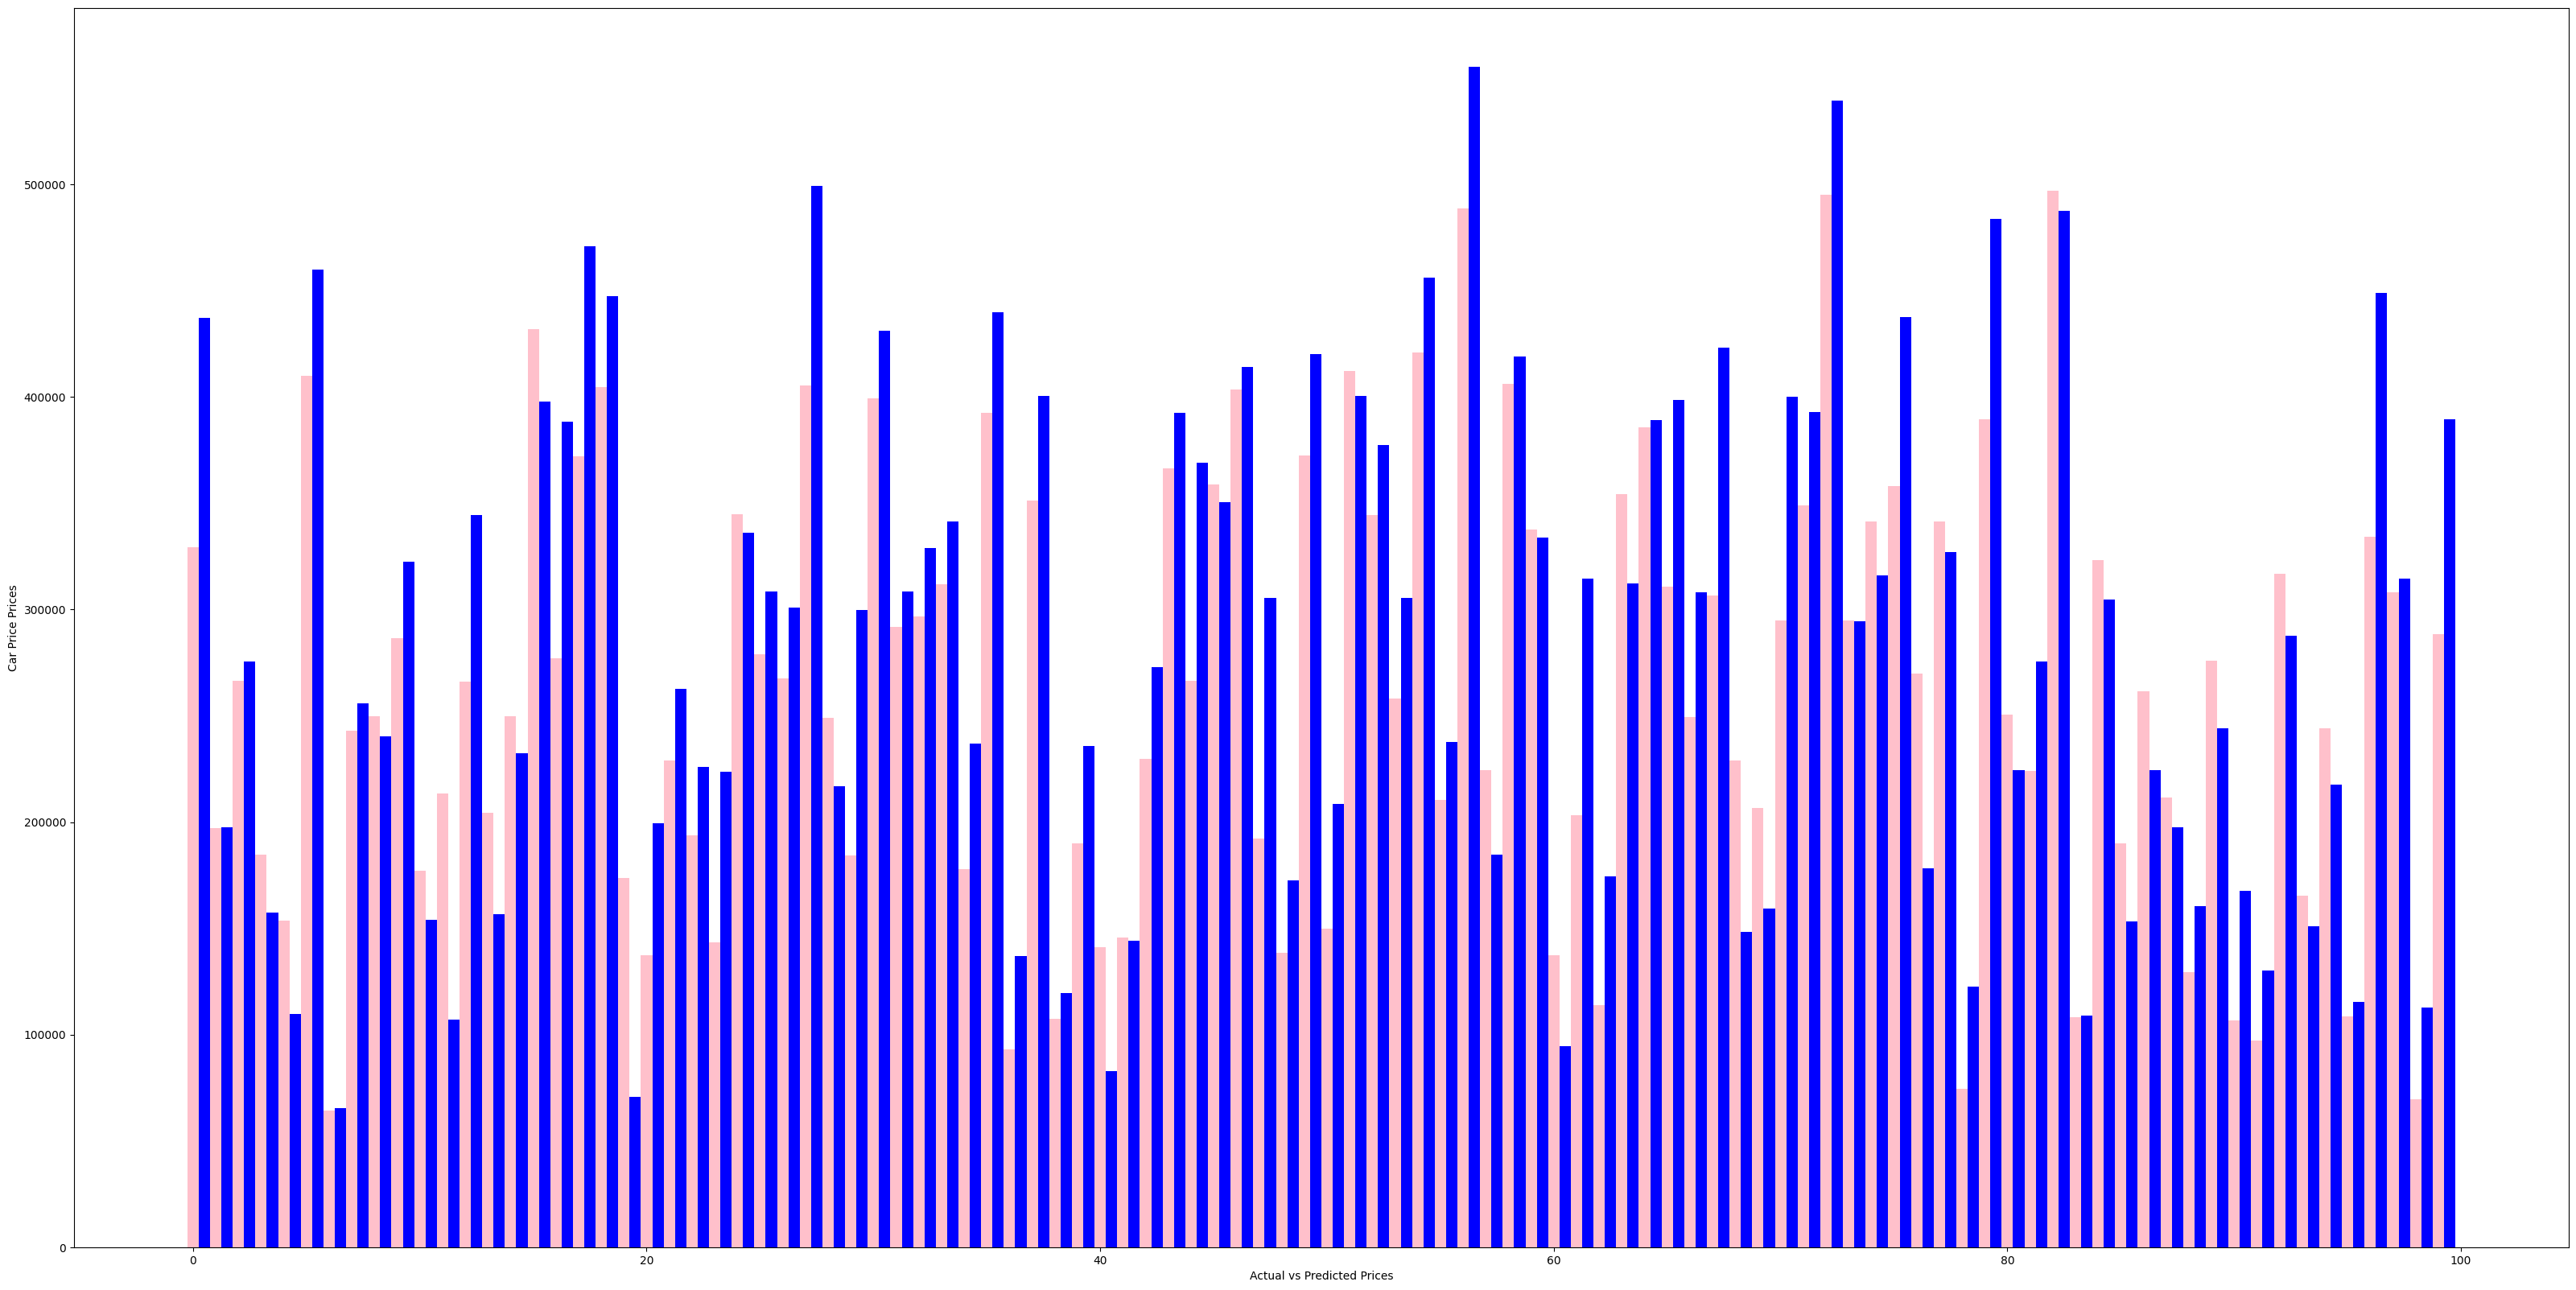

In [45]:
import numpy as np
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.5

plt.bar(ind, y_pred, width, label='Predicted Car Price',color='pink')
plt.bar(ind + width, y_true, width, label='Actual Car Price',color='blue')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()